# Jonathan Halverson
# Friday, January 6, 2016
# Multiline JSON: Nail salon permits

The json.load command takes a file pointer as the argument not a path to a file. Here we load the nail salon data:

In [1]:
import json
with open('Nail_Salon_Permits.json', 'r') as f:
    rawData = json.load(f)

In [2]:
rawData.keys()

[u'meta', u'data']

A sample data record is below:

In [3]:
rawData['data'][0]

[1,
 u'A5B050AC-A54F-4F49-B87D-8BBCF1E50BBB',
 1,
 1426245046,
 u'525314',
 1426245046,
 u'525314',
 u'{\n}',
 u'730',
 u'2011N-00057',
 u'Wonder Nails',
 u'13',
 u'Poplar',
 u'ST',
 u'Roslindale',
 u'MA',
 u'2131',
 u'0',
 u'1',
 u'0',
 u'0',
 u'0',
 u'0',
 None,
 u'3',
 u'3',
 u'2012-01-20T00:00:00',
 None,
 u'2012-01-20T00:00:00',
 u'2013-01-19T00:00:00',
 u'2011-09-20T00:00:00',
 u'Renewal',
 u'2012N-00057',
 u'1',
 u'1',
 u'1',
 u'1',
 u'1',
 u'0',
 u'140.00',
 u'2013-02-12T00:00:00']

Note that the schema (column names and types) is not explicitly attached to the data records. Let's extract the schema and column names:

In [4]:
len(rawData['meta']['view'])

38

By trial and error the following code can be used:

In [5]:
column_names = []
types = []
for i in range(41):
    column = rawData['meta']['view']['columns'][i]['name']
    dtype = rawData['meta']['view']['columns'][i]['dataTypeName']
    column_names.append(column)
    types.append(dtype)
    print column, ' -- ', dtype

sid  --  meta_data
id  --  meta_data
position  --  meta_data
created_at  --  meta_data
created_meta  --  meta_data
updated_at  --  meta_data
updated_meta  --  meta_data
meta  --  meta_data
Salon_BusinessID  --  number
Permit_Number  --  text
SalonName  --  text
Salon St No  --  number
SalonStName  --  text
Salon St Ext  --  text
Salon Neighborhood  --  text
Salon State  --  text
Salon Zip  --  number
Salon Closed  --  number
Services Nails  --  number
Services Tanning  --  number
Services Hair  --  number
Services Spa  --  number
Services Wax  --  number
Services Other  --  text
Number Tables  --  number
Number Baths  --  number
Salon_First_Visit  --  calendar_date
Salon_Last_Visit  --  calendar_date
Permit Start  --  calendar_date
Permit End  --  calendar_date
Application Date  --  calendar_date
Application Type  --  text
Previous Permit  --  text
Permit_Use and Occupancy  --  number
Permit_Flammable Storage  --  number
Permit_Salon BOC License  --  number
Permit_Cosmetologist License

In [6]:
import pandas as pd
df = pd.DataFrame(rawData['data'], columns=column_names)

In [7]:
df.head(3).transpose()

,0,1,2
sid,1,2,3
id,A5B050AC-A54F-4F49-B87D-8BBCF1E50BBB,E73FFC8B-BE30-4C62-A594-41CFA75F578B,CCA1F10D-EA37-4CA0-8E40-422778425B8A
position,1,2,3
created_at,1426245046,1426245046,1426245046
created_meta,525314,525314,525314
updated_at,1426245046,1426245046,1426245046
updated_meta,525314,525314,525314
meta,{\n},{\n},{\n}
Salon_BusinessID,730,730,730
Permit_Number,2011N-00057,2013N-00015,2014N-00014


In [8]:
df.dtypes

sid                               int64
id                               object
position                          int64
created_at                        int64
created_meta                     object
updated_at                        int64
updated_meta                     object
meta                             object
Salon_BusinessID                 object
Permit_Number                    object
SalonName                        object
Salon St No                      object
SalonStName                      object
Salon St Ext                     object
Salon Neighborhood               object
Salon State                      object
Salon Zip                        object
Salon Closed                     object
Services Nails                   object
Services Tanning                 object
Services Hair                    object
Services Spa                     object
Services Wax                     object
Services Other                   object
Number Tables                    object


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 41 columns):
sid                              573 non-null int64
id                               573 non-null object
position                         573 non-null int64
created_at                       573 non-null int64
created_meta                     573 non-null object
updated_at                       573 non-null int64
updated_meta                     573 non-null object
meta                             573 non-null object
Salon_BusinessID                 573 non-null object
Permit_Number                    547 non-null object
SalonName                        573 non-null object
Salon St No                      573 non-null object
SalonStName                      573 non-null object
Salon St Ext                     548 non-null object
Salon Neighborhood               573 non-null object
Salon State                      573 non-null object
Salon Zip                        573 non-null objec

Let's look to see which neighborhood has the most salons:

In [10]:
neigh_counts = df['Salon Neighborhood'].value_counts()

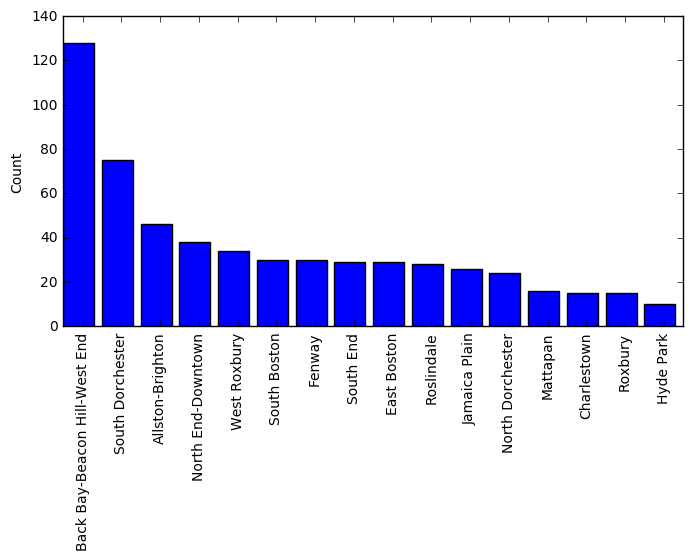

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(8,4))
plt.bar(range(len(neigh_counts)), neigh_counts, tick_label=neigh_counts.index)
plt.xticks(np.array(range(len(neigh_counts))) + 0.5, rotation=90)
plt.ylabel('Count')

What is the distribution of the number of baths? First we need to replace null values with 0:

In [12]:
df['Number Baths'].fillna(0, inplace=True)
df['Number Baths'] = df['Number Baths'].astype(int)

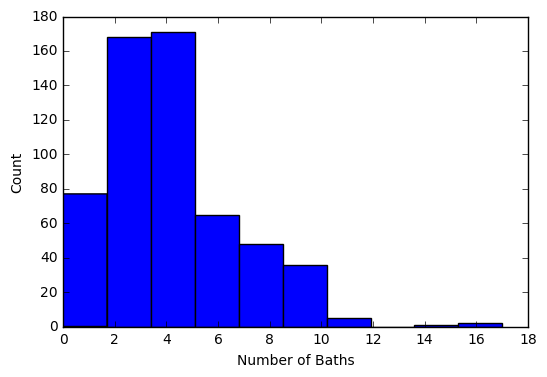

In [13]:
plt.hist(df['Number Baths'])
plt.xlabel('Number of Baths')
plt.ylabel('Count')

Let's find out which salons have the highest average number of tables as was done in the Spark SQL notebook:

In [14]:
df['Number Tables'].isnull().value_counts()

False    542
True      31
Name: Number Tables, dtype: int64

In [15]:
df['Number Tables'].fillna(0, inplace=True)
df['Number Tables'] = df['Number Tables'].astype(int)

In [31]:
df.groupby('Salon Neighborhood').agg({'Number Tables': np.mean}).sort_values('Number Tables', ascending=False)

,Number Tables
Salon Neighborhood,
South Dorchester,7.253333
Roxbury,6.866667
South Boston,6.000000
Mattapan,5.375000
South End,5.137931
West Roxbury,5.058824
Back Bay-Beacon Hill-West End,5.000000
Charlestown,4.866667
North Dorchester,4.583333
